In [1]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from pandas.tools.plotting import parallel_coordinates

from sklearn import svm

from sklearn.metrics import jaccard_similarity_score

#from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

random_state = 100
#import xgboost as xgb

import pickle
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
#IMPORT DATA
data = pickle.load( open( "initial_features.pkl", "rb" ))
labels = pickle.load(open("initial_labels.pkl", "rb"))

#X = data.values
#y = labels.values

In [3]:
# create training and testing vars
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.3)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(5338, 14) (5338, 1)
(2288, 14) (2288, 1)


In [4]:
#CV SVM train
#clf = svm.SVC(kernel='linear', C=100)
#scores = cross_val_score(clf, X_train, np.ravel(Y_train), cv=10)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

#scores = np.dot(X_train, clf.coef_.T)
#b0 = Y_train==0 # boolean or "mask" index arrays
#b1 = Y_train==1
#malignant_scores = scores[b1]
#benign_scores = scores[b0]

#fig  = plt.figure()
#fig.suptitle("score breakdown by classification", fontsize=14, fontweight='bold')
#score_box_plt = plt.boxplot(
#    [malignant_scores, benign_scores],
#    notch=True,
#    labels=[0,1],
#    vert=False
#)
#plt.show(score_box_plt)   

/Users/manolis/anaconda3/envs/tensorflow35/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


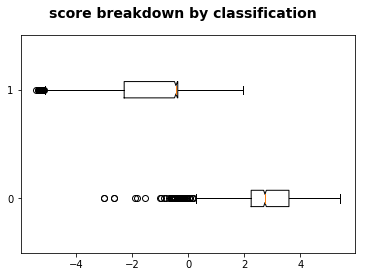

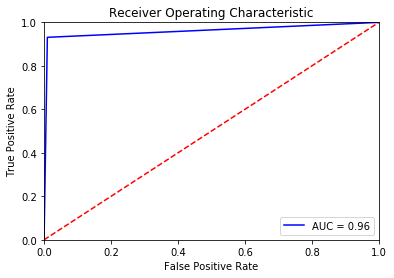

In [5]:
lin_clf = svm.SVC(kernel='linear')
lin_clf.fit(X_train,Y_train)

scores = np.dot(X_train, lin_clf.coef_.T)

b0 = Y_train==0 # boolean or "mask" index arrays
b1 = Y_train==1
malignant_scores = scores[b1]
benign_scores = scores[b0]

fig  = plt.figure()
fig.suptitle("score breakdown by classification", fontsize=14, fontweight='bold')
score_box_plt = plt.boxplot(
    [malignant_scores, benign_scores],
    notch=True,
    labels=[0,1],
    vert=False
)
plt.show(score_box_plt) 

# get the predictions
probas_ = lin_clf.predict(X_test)
            
# turn the predictions into correct format
probas_ = np.array([(1-x, x) for x in probas_])

# create roc curve
probs = lin_clf.predict(X_test)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

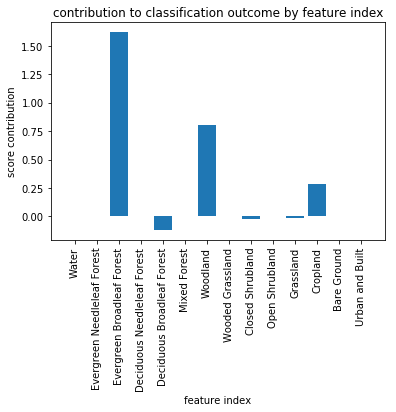

Sorted features by max value :


[(2, 1.6184684241235767),
 (6, 0.8032893706724775),
 (11, 0.28305972290994635),
 (4, -0.11903441380065977),
 (8, -0.020653848226125135),
 (10, -0.009107123113590607),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0)]

In [6]:
## Get contributing features on classification for a selected example

selected_example = data.values[3]

lin_clf.predict(selected_example.reshape(1,14))

contributions = np.multiply(selected_example, lin_clf.coef_.reshape((14,)))
feature_number = np.arange(len(contributions)) +1

plt.bar(list(data), contributions, align='center')
plt.xticks(list(data), rotation='vertical')
plt.xlabel('feature index')
plt.ylabel('score contribution')
plt.title('contribution to classification outcome by feature index')
plt.show()

# Sort features
abs_contributions = np.flip(np.sort(np.absolute(contributions)), axis=0)
feat_and_contrib = []
for contrib in abs_contributions:
    if contrib not in contributions:
        contrib = -contrib
        feat = np.where(contributions == contrib)
        feat_and_contrib.append((feat[0][0], contrib))
    else:
        feat = np.where(contributions == contrib)
        feat_and_contrib.append((feat[0][0], contrib))

# sorted by max abs value. each row a tuple:;(feature index, contrib)
print("Sorted features by max value :")
feat_and_contrib